# Init

In [6]:
import numpy as np
import logging
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%cd ..
%load_ext autoreload

import plotly.graph_objects as go

c:\Users\kepes\Projects
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2
from src.MapData import MapData
from src.LineFinder import LineFinder

from src.plotting_functions import plot_embedding, plot_single_variable_map

In [15]:
map_data = MapData()
map_data.get_metadata()
map_data.load_wavelenths()

c:\Users\kepes\Projects\segmentation\src\MapData.py:164: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


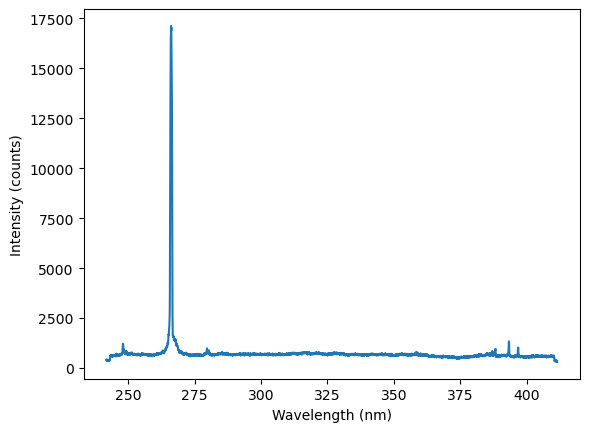

In [4]:
map_data.plot_random_spectrum(return_fig=False)

In [18]:
map_data.spectra = map_data.spectra[:,64:-64]

In [17]:
map_data.load_all_data()
map_data.get_map_dimensions()

c:\Users\kepes\Projects\segmentation\src\plotting_functions.py:168: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


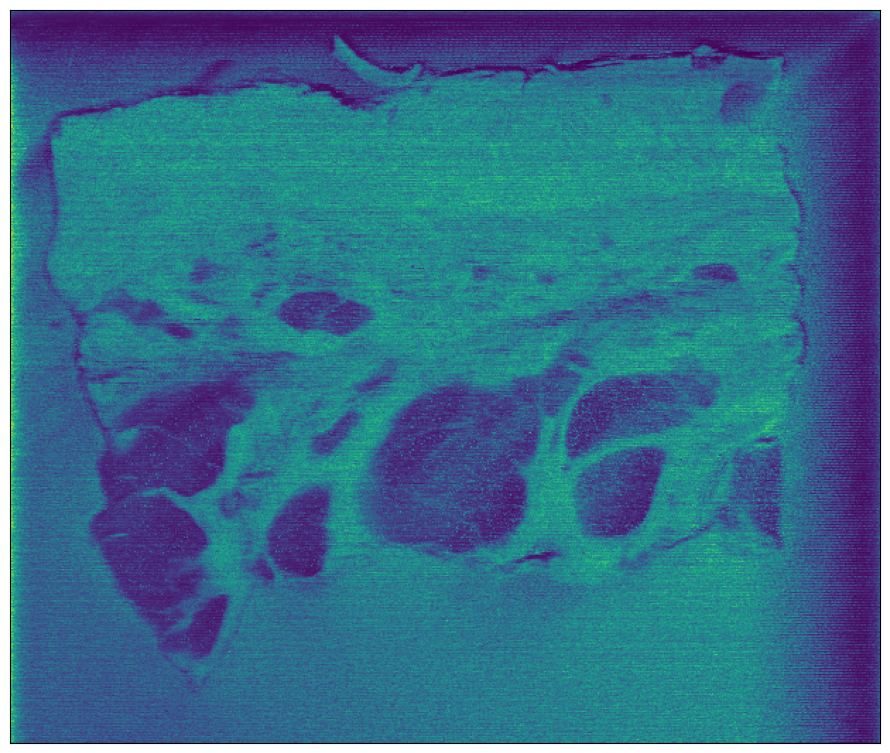

In [6]:
full_emissivities = map_data.spectra.sum(axis=1)

full_emissivities = full_emissivities.reshape(map_data.map_dimensions[::-1])
full_emissivities[::2,:] = full_emissivities[::2,::-1]

plot_single_variable_map(
    full_emissivities,
    f'total_emissivity_map',
    save_cond=False,
    fig_size_scaling=3
)

# scan direction dependent statistics

In [30]:
dir_right = map_data.spectra[::2]
dir_left = map_data.spectra[1::2]

(array([  17.,  233.,  997., 1735., 2209., 2080., 2050., 2399., 2713.,
        2813., 3240., 3574., 3765., 4216., 4747., 5164., 5425., 5677.,
        5841., 5973., 5865., 5636., 5410., 5115., 4721., 4515., 4175.,
        4066., 3886., 3749., 3662., 3564., 3288., 3146., 2739., 2373.,
        2148., 1680., 1526., 1215., 1135.,  997.,  950.,  909.,  941.,
         912.,  950.,  991.,  994., 1009.,  904.,  947.,  957.,  942.,
         849.,  798.,  771.,  697.,  659.,  567.,  454.,  438.,  352.,
         343.,  315.,  236.,  209.,  173.,  149.,  170.,  135.,   99.,
          99.,   70.,   73.,   79.,   54.,   61.,   39.,   39.,   36.,
          41.,   35.,   27.,   32.,   44.,   32.,   45.,   33.,   37.,
          51.,   25.,   28.,   34.,   23.,   31.,   31.,   22.,   29.,
         403.]),
 array([ 2848.72363281,  3471.92675781,  4095.12988281,  4718.33300781,
         5341.53613281,  5964.73925781,  6587.94238281,  7211.14550781,
         7834.34863281,  8457.55175781,  9080.75488281,  9

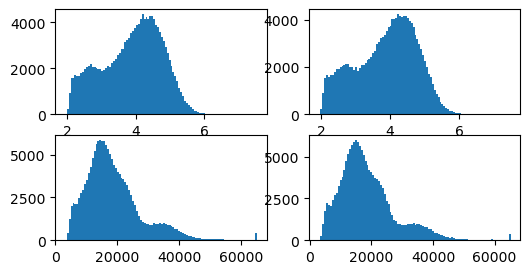

In [38]:
BIN_COUNT = 100
fig,ax = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(6,3)
)
ax[0,0].hist(
  dir_right.sum(axis=1),
  bins=BIN_COUNT
)
ax[0,1].hist(
  dir_left.sum(axis=1),
  bins=BIN_COUNT
)
ax[1,0].hist(
  dir_right.max(axis=1),
  bins=BIN_COUNT
)
ax[1,1].hist(
  dir_left.max(axis=1),
  bins=BIN_COUNT
)

In [36]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
      y=np.squeeze(dir_right[1,:]),
      name='right'
    )
)
fig.add_trace(
    go.Scatter(
      y=np.squeeze(dir_left[0,:]),
      name='left'
    )
)

## normalize to unit maxima

In [21]:
plot_data = np.divide(
    map_data.spectra,
    map_data.spectra.max(axis=1,keepdims=True)
)

c:\Users\kepes\Projects\segmentation\src\plotting_functions.py:168: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


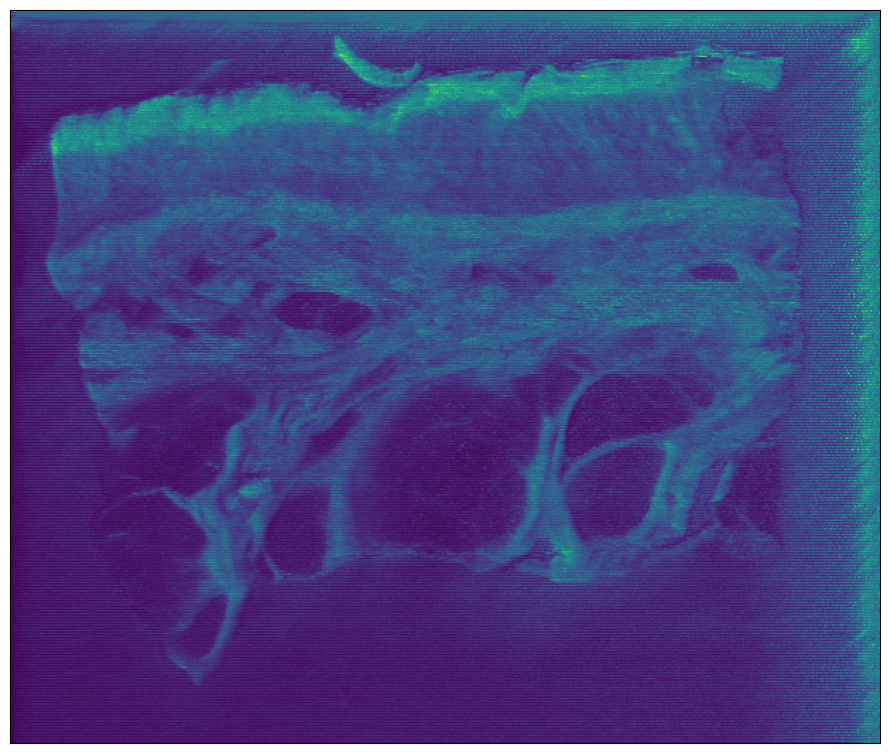

In [23]:
full_emissivities = plot_data.sum(axis=1)

full_emissivities = full_emissivities.reshape(map_data.map_dimensions[::-1])
full_emissivities[::2,:] = full_emissivities[::2,::-1]

plot_single_variable_map(
    full_emissivities,
    f'total_emissivity_map',
    save_cond=False,
    fig_size_scaling=3
)

## normalize to unit area

In [27]:
plot_data = np.divide(
    map_data.spectra,
    map_data.spectra.sum(axis=1,keepdims=True)
)

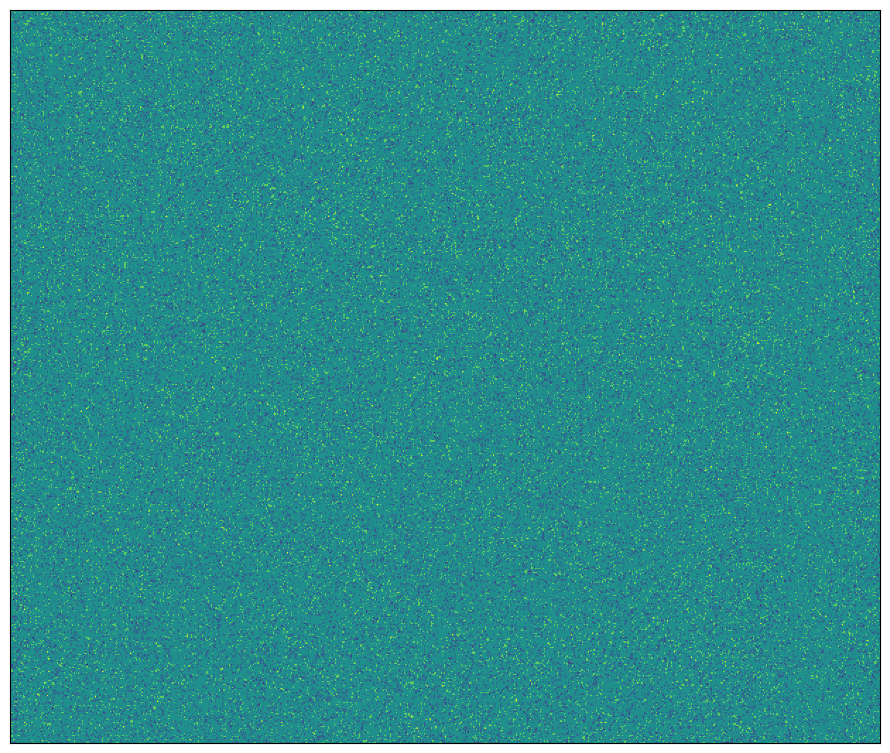

In [28]:
full_emissivities = plot_data.sum(axis=1)\
  .reshape(map_data.map_dimensions[::-1])


full_emissivities[::2,:] = full_emissivities[::2,::-1]

plot_single_variable_map(
    full_emissivities,
    f'total_emissivity_map',
    save_cond=False,
    fig_size_scaling=3
)